In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor




In [2]:
# Train data
with open('train_x.npy', 'rb') as fname:
    train_x = np.load(fname)
    
with open('train_y_mkp.npy', 'rb') as fname:
    train_y_mkp = np.load(fname)

with open('train_y_loc.npy', 'rb') as fname:
    train_y_loc = np.load(fname)
    
    
# Test data
with open('test_x.npy', 'rb') as fname:
    test_x = np.load(fname)
    
with open('test_y_mkp.npy', 'rb') as fname:
    test_y_mkp = np.load(fname)

with open('test_y_loc.npy', 'rb') as fname:
    test_y_loc = np.load(fname)

print("%g datapoints loaded for training\n" % len(train_x))
print("%g datapoints loaded for testing" % len(test_x))

167734 datapoints loaded for training

72346 datapoints loaded for testing


In [3]:
train_y_mkp = np.squeeze(train_y_mkp)
test_y_mkp = np.squeeze(test_y_mkp)

In [4]:
reg = RandomForestRegressor(max_depth=10, criterion='mse', random_state=0)
reg.fit(train_x, train_y_mkp)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [5]:
y_pred = reg.predict(test_x)

## MAE

In [6]:
mae = np.mean(np.abs(y_pred - test_y_mkp))
print("Mean Absolute Error: %g" % mae)

Mean Absolute Error: 5.52613


## MSE

In [7]:
mse = np.mean((y_pred - test_y_mkp) ** 2)
print("Mean Square Error: %g" % mse)

Mean Square Error: 77.58


## MAPE

In [8]:
mape = np.mean(np.abs((test_y_mkp - y_pred) / test_y_mkp))
print("Mean Absolute Percentage Error: %g%%" % (mape*100))

Mean Absolute Percentage Error: 17.2325%


## RMSE

In [9]:
rmse = np.sqrt(np.mean((y_pred - test_y_mkp) ** 2))
print("Root Mean Square Error: %g" % rmse)

Root Mean Square Error: 8.80795


## R-square

In [10]:
r2 = 1 - np.sum((test_y_mkp - y_pred) ** 2) / np.sum((np.mean(test_y_mkp) - y_pred) ** 2)
print("R2: %g" % r2)

R2: 0.893102


In [11]:
y_pred = np.expand_dims(y_pred, axis=1)


In [12]:
y_pred.shape

(72346, 1)

In [13]:

test_y_mkp = np.expand_dims(test_y_mkp, axis=1)

In [14]:
test_y_loc.shape

(72346, 1)

In [15]:
test_y_mkp.shape

(72346, 1)

In [16]:
np.sum(y_pred>test_y_loc) / y_pred.shape[0]

0.9079147430403892

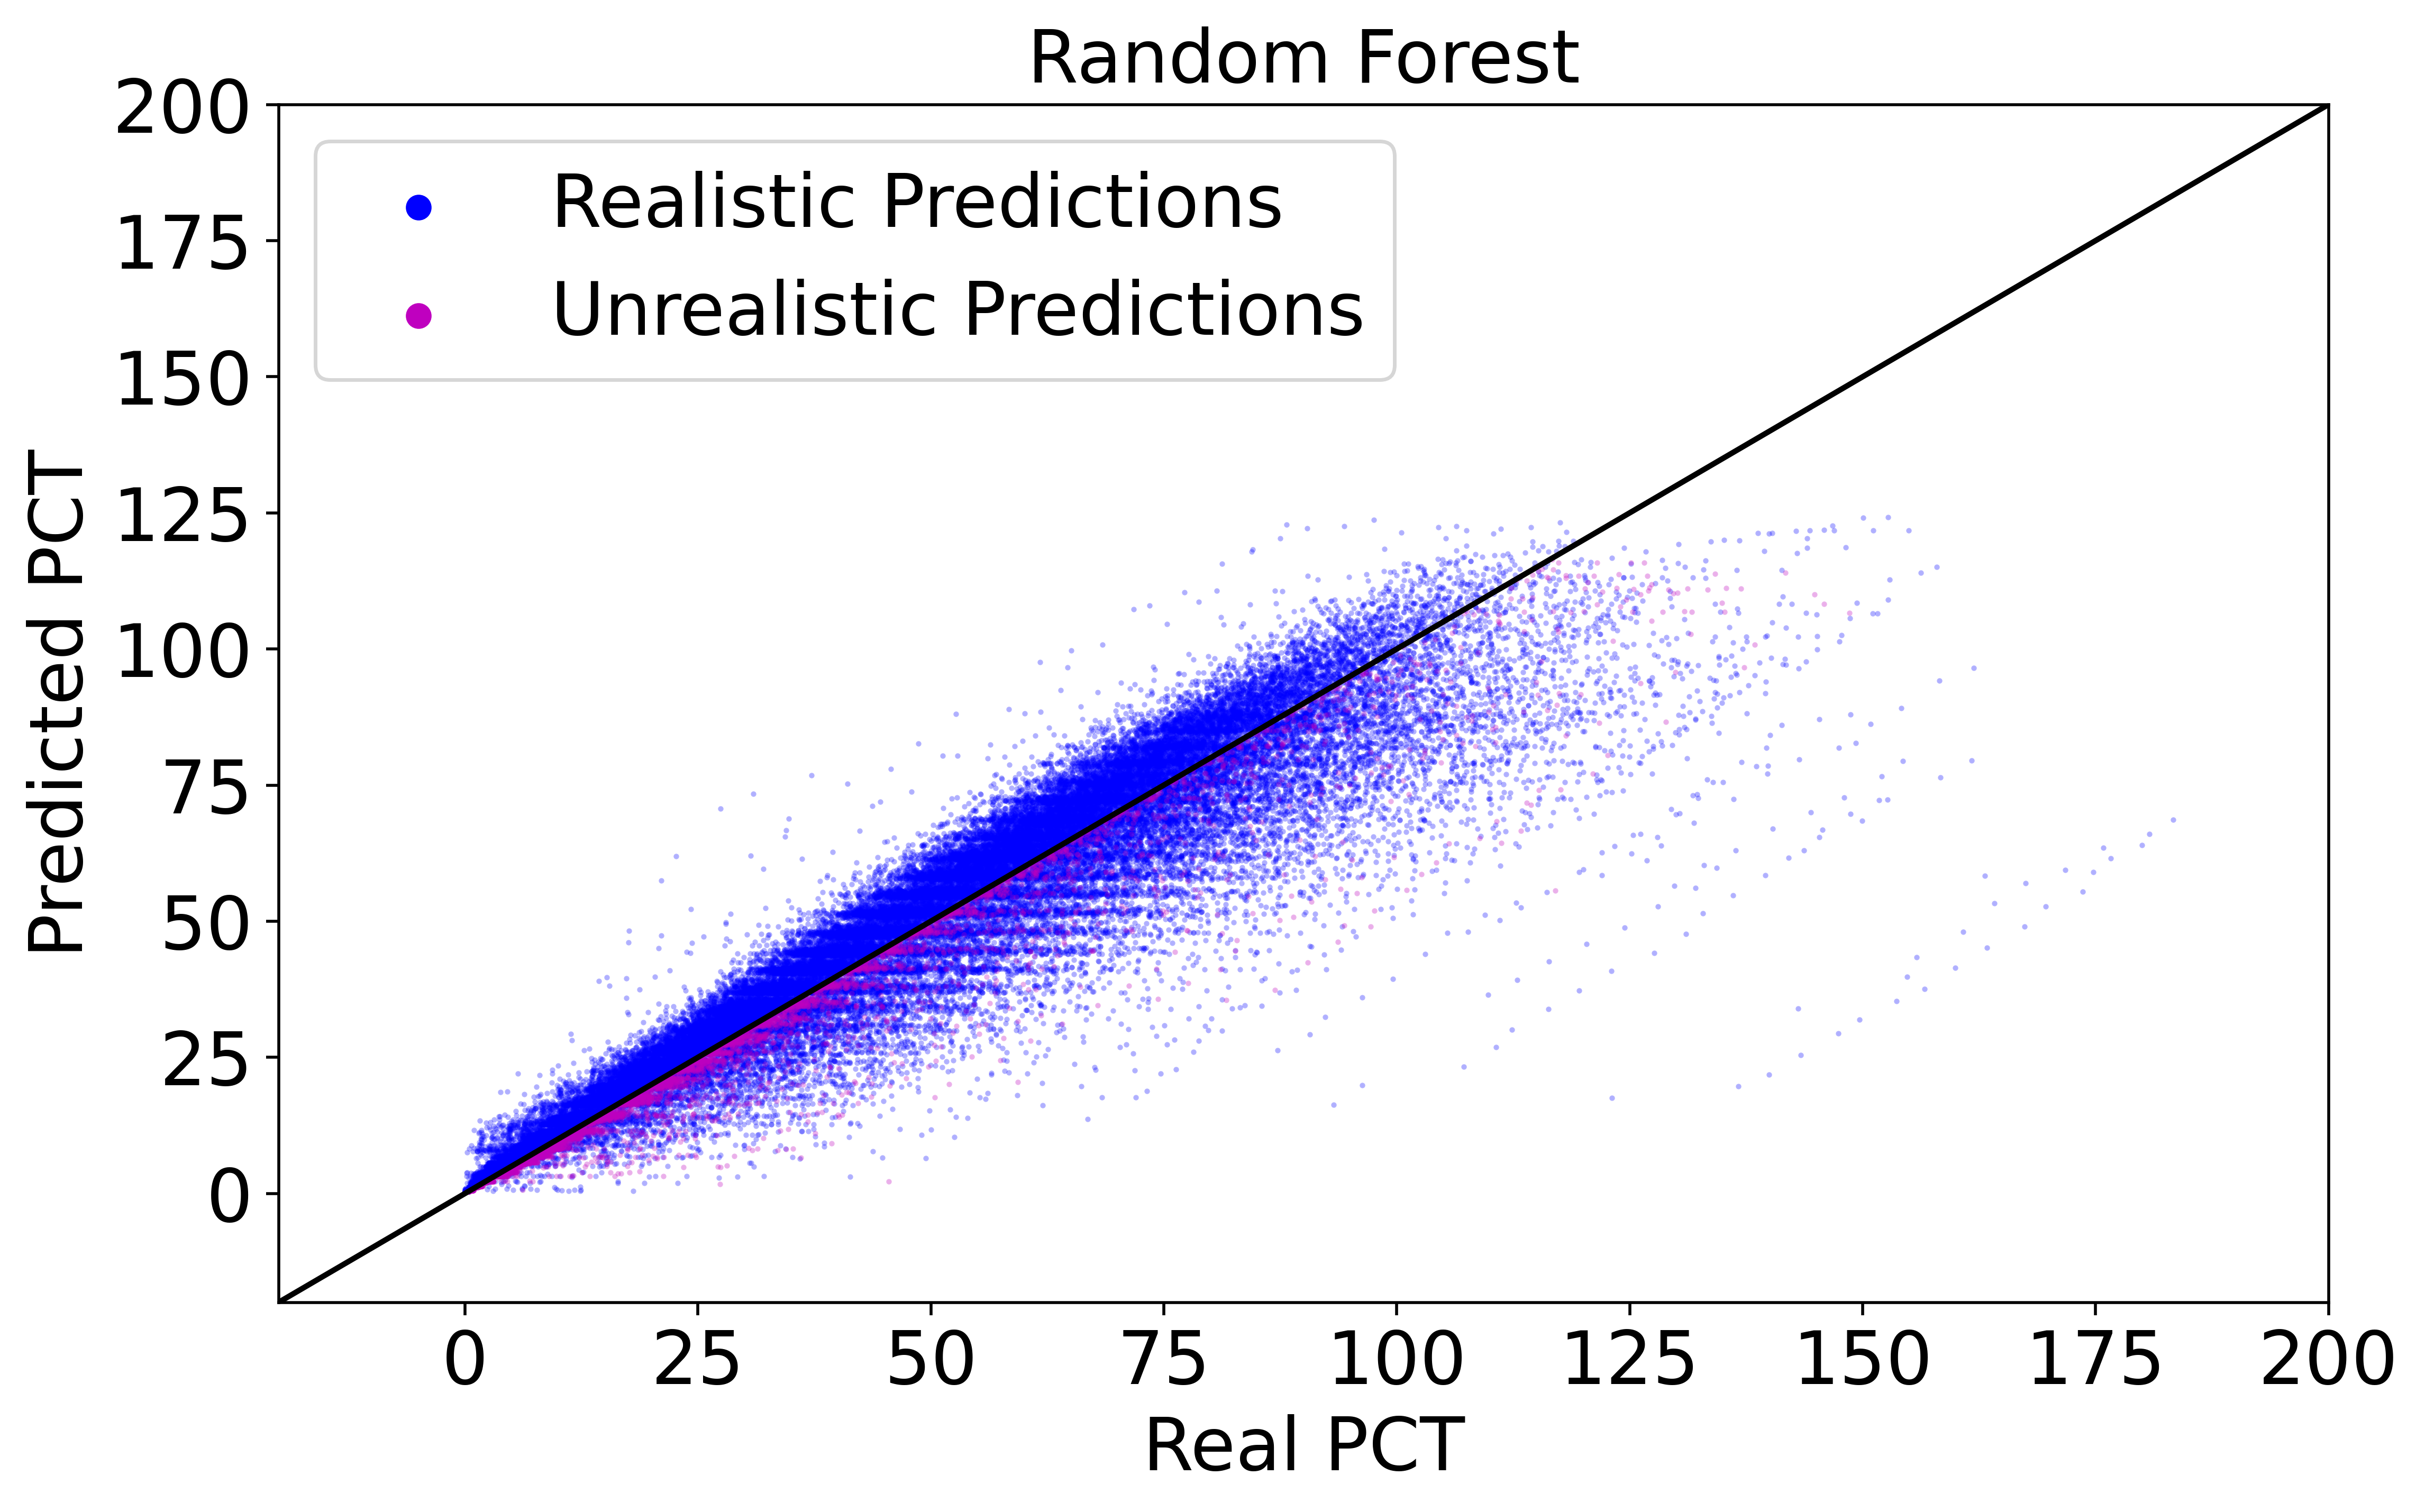

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

alpha = 0.3

ax.scatter([1000], [1000], color='blue', marker='o')
ax.scatter([1000], [1000], color='m', marker='o')
ax.legend(['Realistic Predictions', 'Unrealistic Predictions'], fontsize=20)

ax.scatter(test_y_mkp[y_pred>=test_y_loc], y_pred[y_pred>=test_y_loc], marker='.', alpha=alpha, color='blue', s=1)
ax.scatter(test_y_mkp[y_pred<test_y_loc], y_pred[y_pred<test_y_loc], marker='.', alpha=alpha, color='m', s=1)


ax.plot([-20, 200], [-20, 200], color='black')
ax.set_xlim([-20, 200])
ax.set_ylim([-20, 200])

ax.set_title('Random Forest', fontsize=20)
ax.set_xlabel('Real PCT', fontsize=20)
ax.set_ylabel('Predicted PCT', fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
fig.savefig("rf.png")
plt.show()